# Q2

normal equation ridge regression

In [281]:
import numpy as np 
from numpy.linalg import inv
import random

def NormalEquationRidgeRegression(x,y,penalty):
    r,c = x.shape
    X = np.c_[np.ones(r),x]
    X_t = np.transpose(X)
    X_t_X = np.matmul(X_t,X)
    identity_mat = np.identity(c+1)
    identity_mat[0,0]=0
    mat = X_t_X - penalty*identity_mat
    mat_inverse = inv(mat)
    X_t_y = np.matmul(X_t,y)
    theta = np.matmul(mat_inverse,X_t_y)
    ans= theta.reshape(c+1,1)
    return ans

In [317]:
X=np.array([[1],[3],[6]])
X=X.reshape(-1,1)
Y=np.array([[6],[10],[16]])
Y=Y.reshape(-1,1)
NormalEquationRidgeRegression(X,Y,1)


array([[3.42857143],
       [2.17142857]])

coordinate descent regression

In [283]:
def CoordinateDescentRegression(x,y,iterations):
    r,c=x.shape
    y=y.reshape(-1,1)
    X=np.c_[np.ones(r),x]
    theta=np.zeros((c+1,1))
    for i in range (0,iterations):
        i =i%(c+1)
        X_calc = np.delete(X,[i],1)
        theta_calc = np.delete(theta,[i],0)
        X_col_i = X[:,i]
        X_theta_calc= np.matmul(X_calc,theta_calc)
        error_exc_i = y - X_theta_calc
        numerator = np.sum(np.matmul(np.transpose(error_exc_i),X_col_i))
        denominator = np.sum(np.matmul(np.transpose(X_col_i),X_col_i))
        theta_i = numerator/denominator
        theta[i,0]=theta_i
    return theta
        

In [284]:
CoordinateDescentRegression(X,Y,50)

array([[4.00292962],
       [1.99936313]])

coordinate descent LASSO

In [285]:
def CoordinateDescentLasso(x,y,iterations,penalty):
    r,c=x.shape
    y=y.reshape(-1,1)
    X=np.c_[np.ones(r),x]
    theta=np.zeros((c+1,1))
    for i in range (0,iterations):
        i =i%(c+1)
        X_calc = np.delete(X,[i],1)
        theta_calc = np.delete(theta,[i],0)
        X_col_i = X[:,i]
        X_theta_calc= np.matmul(X_calc,theta_calc)
        error_exc_i = y - X_theta_calc
        numerator = np.sum(np.matmul(np.transpose(error_exc_i),X_col_i))
        denominator = np.sum(np.matmul(np.transpose(X_col_i),X_col_i))
        
        if numerator>(penalty/2):
            theta_i = (numerator - (penalty/2))/denominator
            theta[i,0]=theta_i
        
        elif numerator<(-1*(penalty/2)):
            theta_i = (numerator + (penalty/2))/denominator
            theta[i,0]=theta_i
            
        else:
            theta_i=0
            theta[i,0]=theta_i
    return theta
        

In [286]:
CoordinateDescentLasso(X,Y,50,1)

array([[3.52938032],
       [2.09143906]])

SGD regression 

In [287]:
def sgdRegression(x,y,iterations,alpha=0.1):
    r,c = x.shape
    y = y.reshape(-1,1)
    X = np.c_[np.ones(r),x]
    theta = np.zeros((c+1,1))
    for _ in range (0,iterations):
        i = random.randint(0,r-1)
        X_i = X[i,:]
        X_i_theta = np.matmul(X_i,theta)
        error = y[i] - X_i_theta
        for j in range (0,c+1):
            theta[j] = theta[j] - alpha*2*error*(-1)*X_i[j]
    
    return theta

In [288]:
sgdRegression(X,Y,150,alpha=0.05)

array([[3.98421545],
       [1.98424691]])

autograd LASSO

In [341]:
from autograd import grad
from autograd.numpy import sqrt

def error(theta,x,y,penalty):
    r,c = x.shape
    r_y,_=y.shape
    
    y_predict = np.dot(x,theta)
    error = (np.sum(np.square(y - y_predict)) + np.linalg.norm(theta,1))/r_y
    return error

def GradientDescentAutogradLasso(x,y,alpha,iterations,penalty):
    r,c = x.shape
    y = y.reshape(-1,1)
    theta = np.random.random((c+1,1))
    X = np.c_[np.ones(r),x]
    
    gradient=grad(error)
    
    for _ in range(0,iterations):
        theta = theta -alpha*gradient(theta,X,y,penalty)
    return theta 

GradientDescentAutogradLasso(X,Y,0.01,5000,1)

array([[3.52631579],
       [2.09210526]])

# Q4

PART A

In [103]:
x = np.array([[1,2],[2,4],[3,6],[4,8]])
y = np.array([[2],[3],[4],[5]])

from sklearn.linear_model import Ridge
l2_reg = Ridge(alpha = 1)
l2_reg.fit(x,y)
l2_reg.predict(x)

array([[2.05769231],
       [3.01923077],
       [3.98076923],
       [4.94230769]])

PART B

YES we can now learn the coefficients 

In [101]:
NormalEquationRidgeRegression(x,y,1)

array([[0.89583333],
       [0.20833333],
       [0.41666667]])

# Q5

PART A

In [292]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split
import pandas as pd
import math
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
data = pd.read_excel('Real_estate_valuation_data_set.xlsx')
columns = ["X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"]
data_features = data[columns]
y = data["Y house price of unit area"]

In [293]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
data_features= normalize(data_features)

In [294]:
r,c = data_features.shape
fold = 5
row_set = int(r/fold)
crossfold_dict = dict()
for i in range (0,fold):
    if i ==(fold-1):
        crossfold_dict[str(i)]= data_features.iloc[row_set*i:,:].reset_index(drop=True)
    else:   
        crossfold_dict[str(i)]= data_features.iloc[row_set*i:row_set*(i+1),:].reset_index(drop=True)



In [295]:
crossfold_dict_target = dict()
r= len(y)
row_set = int(r/fold)
for i in range (0,fold):
    if i ==(fold-1):
        crossfold_dict_target[str(i)]= y.iloc[row_set*i:].reset_index(drop=True)
    else:   
        crossfold_dict_target[str(i)]= y.iloc[row_set*i:row_set*(i+1)].reset_index(drop=True)

In [296]:
def dict_rolling(dictionary):
    l = len(dictionary)
    for k in range (0,l):
        if k == l-1:
            dictionary[str(k)] = dictionary ['0']
        else:
            dictionary[str(k)] = dictionary [str(k+1)]

In [297]:
optimal_penalty=[0,0,0,0,0]
penalty= np.arange(5000)
best_error_validation = [0,0,0,0,0]
best_error_test = [0,0,0,0,0]

for j in range (0,fold):
    print(j)
    dict_rolling(crossfold_dict)
    dict_rolling(crossfold_dict_target)
    
    validation_error = 999999
    test_error =999999
    
    train_frames = [crossfold_dict['0'],crossfold_dict['1'],crossfold_dict['2']]
    train_frames_target = [crossfold_dict_target['0'],crossfold_dict_target['1'],crossfold_dict_target['2']]
    
    train_set = pd.concat(train_frames).reset_index(drop=True)
    train_set_target = pd.concat(train_frames_target).reset_index(drop=True)
    
    for i in range (1,5000):
        model = Ridge(alpha = penalty[i])
        model.fit(train_set,train_set_target)
        
        y_predict_validation = model.predict(crossfold_dict['3'])
        y_predict_test = model.predict(crossfold_dict['4'])
        
        val_error = math.sqrt(mean_squared_error(crossfold_dict_target['3'],y_predict_validation))
        te_error = math.sqrt(mean_squared_error(crossfold_dict_target['4'],y_predict_test))
        
        if val_error<validation_error:
            validation_error = val_error
            optimal_penalty[j] = i 
            test_error = te_error
    
    best_error_validation[j] = validation_error
    best_error_test[j] = test_error
print('optimal penalty for each fold',optimal_penalty)
print('best error for validation sets', best_error_validation)
print('best error for test sets', best_error_test)

0
1
2
3
4
optimal penalty for each fold [1, 1, 1, 1, 1]
best error for validation sets [7.8984097493111065, 9.254866193683393, 7.6410762128123535, 11.86858839145044, 7.8984097493111065]
best error for test sets [9.194627780092663, 7.613883720956176, 11.815876748023161, 7.884616652035069, 9.194627780092663]


PART B

In [298]:
from sklearn.linear_model import Lasso

optimal_penalty=[0,0,0,0,0]
penalty= np.arange(5000)
best_error_validation = [0,0,0,0,0]
best_error_test = [0,0,0,0,0]

for j in range (0,fold):
    print(j)
    dict_rolling(crossfold_dict)
    dict_rolling(crossfold_dict_target)
    
    validation_error = 999999
    test_error =999999
    
    train_frames = [crossfold_dict['0'],crossfold_dict['1'],crossfold_dict['2']]
    train_frames_target = [crossfold_dict_target['0'],crossfold_dict_target['1'],crossfold_dict_target['2']]
    
    train_set = pd.concat(train_frames).reset_index(drop=True)
    train_set_target = pd.concat(train_frames_target).reset_index(drop=True)
    
    for i in range (1,5000):
        model = Lasso(alpha = penalty[i])
        model.fit(train_set,train_set_target)
        
        y_predict_validation = model.predict(crossfold_dict['3'])
        y_predict_test = model.predict(crossfold_dict['4'])
        
        val_error = math.sqrt(mean_squared_error(crossfold_dict_target['3'],y_predict_validation))
        te_error = math.sqrt(mean_squared_error(crossfold_dict_target['4'],y_predict_test))
        
        if val_error<validation_error:
            validation_error = val_error
            optimal_penalty[j] = i 
            test_error = te_error
    
    best_error_validation[j] = validation_error
    best_error_test[j] = test_error
print('optimal penalty for each fold',optimal_penalty)
print('best error for validation sets', best_error_validation)
print('best error for test sets', best_error_test)

0
1
2
3
4
optimal penalty for each fold [1, 1, 1, 1, 1]
best error for validation sets [11.258663602050936, 10.192614634905283, 13.21212842441484, 9.894554857791283, 11.258663602050936]
best error for test sets [10.136259521815541, 13.313976133197245, 9.735493827075835, 11.200812397766505, 10.136259521815541]


PART C

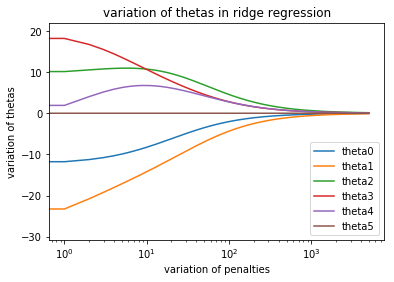

In [299]:
penalty= np.arange(5000)
train_x,test_x,train_y,test_y = train_test_split(data_features,y,random_state= 4)
thetas = np.zeros((5000,len(columns)+1))

for i in range (0,5000):
    model = Ridge(alpha = i)
    model.fit(train_x,train_y)
    theta_o = model.intercept_
    thetas[i,0]=theta_o
    theta_list= model.coef_
    for j in range (0,len(theta_list)):
        thetas[i,j] = theta_list[j]

import matplotlib.pyplot as plt

for k in range (0,len(columns)+1):
    plt.semilogx(penalty,thetas[:,k])

plt.title('variation of thetas in ridge regression')
plt.legend(['theta0','theta1','theta2','theta3','theta4','theta5'])
plt.xlabel('variation of penalties')
plt.ylabel('variation of thetas')
plt.show()

In [305]:
print('sparsity is ',(5000*(len(columns)+1))-np.count_nonzero(thetas))

sparsity is  5000


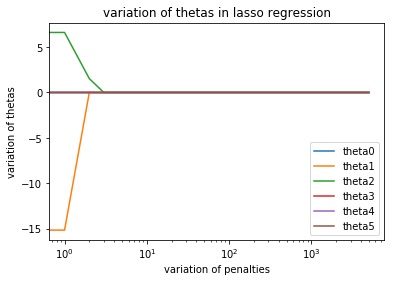

In [306]:
penalty= np.arange(5000)
train_x,test_x,train_y,test_y = train_test_split(data_features,y,random_state= 4)
thetas = np.zeros((5000,len(columns)+1))

for i in range (1,5000):
    model = Lasso(alpha = i)
    model.fit(train_x,train_y)
    theta_o = model.intercept_
    thetas[i,0]=theta_o
    theta_list= model.coef_
    for j in range (0,len(theta_list)):
        thetas[i,j] = theta_list[j]

import matplotlib.pyplot as plt

for k in range (0,len(columns)+1):
    plt.semilogx(penalty,thetas[:,k])

plt.title('variation of thetas in lasso regression')
plt.legend(['theta0','theta1','theta2','theta3','theta4','theta5'])
plt.xlabel('variation of penalties')
plt.ylabel('variation of thetas')
plt.show()

In [307]:
print('sparsity is ',(5000*(len(columns)+1))-np.count_nonzero(thetas))

sparsity is  29997


sparsity of LASSO is more when compared to RIDGE . IN ridge regression the coefficients become close to zero but are never zero. whereas in LASSO the coefficients actually become zero.

PART D

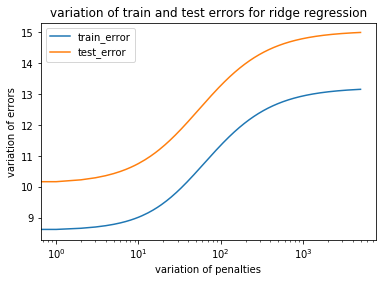

In [308]:
train_x,test_x,train_y,test_y = train_test_split(data_features,y,test_size=0.2,random_state= 4)
penalty=np.arange(5000)
train_error = np.zeros((5000))
test_error = np.zeros((5000))

for i in range (0,5000):
    model= Ridge(alpha = i)
    model.fit(train_x,train_y)
    test_predict = model.predict(test_x)
    train_predict = model.predict(train_x)
    tr_error = math.sqrt(mean_squared_error(train_y,train_predict))
    te_error = math.sqrt(mean_squared_error(test_y,test_predict))
    train_error[i]=tr_error
    test_error[i]=te_error

plt.semilogx(penalty,train_error)
plt.semilogx(penalty,test_error)
plt.legend(['train_error','test_error'])
plt.ylabel('variation of errors')
plt.xlabel('variation of penalties')
plt.title('variation of train and test errors for ridge regression')
plt.show()

/home/chennuri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/chennuri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/chennuri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


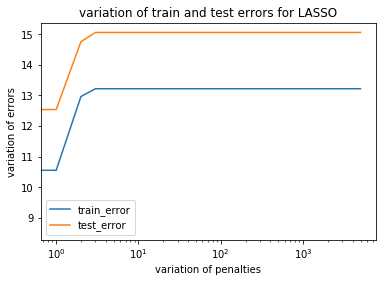

In [309]:
train_x,test_x,train_y,test_y = train_test_split(data_features,y,test_size=0.2,random_state= 4)
penalty=np.arange(5000)
train_error = np.zeros((5000))
test_error = np.zeros((5000))

for i in range (0,5000):
    model= Lasso(alpha = i)
    model.fit(train_x,train_y)
    test_predict = model.predict(test_x)
    train_predict = model.predict(train_x)
    tr_error = math.sqrt(mean_squared_error(train_y,train_predict))
    te_error = math.sqrt(mean_squared_error(test_y,test_predict))
    train_error[i]=tr_error
    test_error[i]=te_error

plt.semilogx(penalty,train_error)
plt.semilogx(penalty,test_error)
plt.legend(['train_error','test_error'])
plt.ylabel('variation of errors')
plt.xlabel('variation of penalties')
plt.title('variation of train and test errors for LASSO')
plt.show()

# Q3

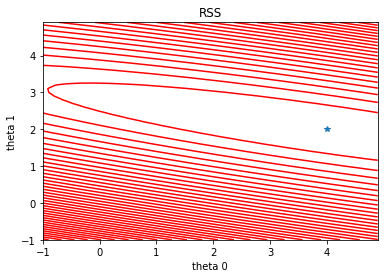

In [344]:
X=np.matrix('1;3;6')
y=np.matrix('6;10;16')
alpha=0.1

(N,d)=np.shape(X)
bias=np.array([1]*N)
temp=np.zeros((N,d+1))
theta=np.zeros((d+1,1))
grad=np.zeros((d+1,1))
temp[:,0]=bias
temp[:,1:]=X
X=np.matrix(temp)


plt.gcf().clear()
theta_x=np.array(np.arange(-1,5,0.1))
theta_y=np.array(np.arange(-1,5,0.1))

theta1,theta2=np.meshgrid(theta_x,theta_y,sparse=True)
theta1=theta1.T
theta2=theta2
res_sum_sq=np.zeros((len(theta2),len(theta1)))

for i in range(len(theta1)):
    for j in range(len(theta2)):
        theta=np.array([theta1[i],theta2[j]])
        res_sum_sq[j,i]=np.sum(np.square((y-(np.matmul(X,theta)))))
theta_x,theta_y=np.meshgrid(theta_x,theta_y)
plt.contour(theta_x,theta_y,res_sum_sq,50,colors='red')
plt.plot(4,2,'*')
plt.title('RSS')
plt.xlabel('theta 0')
plt.ylabel('theta 1')
plt.show()

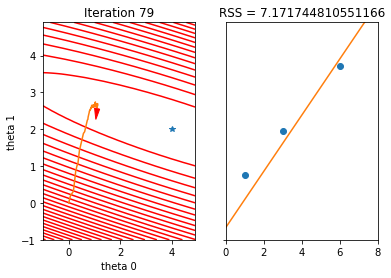

In [370]:
from numpy.random import randint 
rows,_=X.shape
x_reg=np.linspace(0,8,20)
ar_x=[]
ar_y=[]

theta=np.zeros((2,1))
rs=0
alpha=0.01
plt.gcf().clear()
for i in range(79):
    if i==0:
        tp=np.array([[np.array(theta[0][0]),np.array(theta[1][0])]]).T
    else:
        tp=tn
    j = randint(0,rows)
    grad=-2*X[j,:].T*(y[j]-(X[j,:]*theta))/N
    theta=theta-alpha*grad
    tn=np.array([np.array(theta[0][0])[0],np.array(theta[1][0])[0]])
    rs=np.sum(np.square((y-(np.matmul(X,theta)))))
    x_p=tp[0][0]
    y_p=tp[1][0]
    d_x=tn[0][0]-tp[0][0]
    d_y=tn[1][0]-tp[1][0]
    
    plt.subplot(1,2,1)
    plt.cla()
    ar_x.append(x_p)
    ar_y.append(y_p)
    plt.contour(theta_x,theta_y,res_sum_sq,30,colors='red')
    plt.plot(4,2,'*')
    plt.plot(ar_x,ar_y)
    plt.title('Iteration '+str(i+1))
    plt.xlabel('theta 0')
    plt.ylabel('theta 1')

    plt.arrow(x_p,y_p,d_x,d_y,color='red',head_width=0.2)
    
    plt.subplot(1,2,2)
    plt.cla()
    plt.plot([1,3,6],[6,10,16],'o')
    y_reg=x_p+y_p*x_reg
    plt.plot(x_reg,y_reg,'-','')
    plt.title('RSS = '+str(rs))
    plt.xlim(0,8)
    plt.ylim(0,20)
    
    filename=str(format(i+1, '03d'))+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
! convert -delay 10 *.png gif.gif
from IPython.display import Image
Image(url='gif.gif')

PARTB


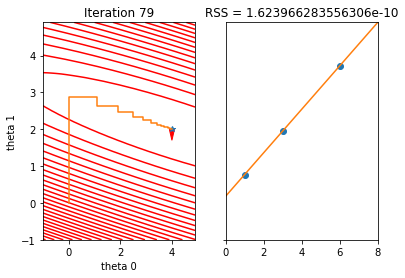

In [369]:
from numpy.random import randint 
rows,c=X.shape
x_reg=np.linspace(0,8,20)
ar_x=[]
ar_y=[]

theta=np.zeros((2,1))
rs=0
alpha=0.01
plt.gcf().clear()
for i in range(79):
    if i==0:
        tp=np.array([theta[0][0],theta[1][0]]).T
    else:
        tp=tn
    ind =(i+1)%c
    X_calc = np.delete(X,[ind],1)
    theta_calc = np.delete(theta,[ind],0)
    X_col_i = X[:,ind]
    X_theta_calc= np.matmul(X_calc,theta_calc)
    error_exc_i = y - X_theta_calc
    numerator = np.sum(np.matmul(np.transpose(error_exc_i),X_col_i))
    denominator = np.sum(np.matmul(np.transpose(X_col_i),X_col_i))
    theta_i = numerator/denominator
    theta[ind,0]=theta_i
    tn=np.array([np.array(theta[0])[0],np.array(theta[1])[0]])
    rs=np.sum(np.square((y-(np.matmul(X,theta)))))
    x_p=tp[0]
    y_p=tp[1]
    d_x=tn[0]-tp[0]
    d_y=tn[1]-tp[1]
    
    plt.subplot(1,2,1)
    plt.cla()
    ar_x.append(x_p)
    ar_y.append(y_p)
    plt.contour(theta_x,theta_y,res_sum_sq,30,colors='red')
    plt.plot(4,2,'*')
    plt.plot(ar_x,ar_y)
    plt.title('Iteration '+str(i+1))
    plt.xlabel('theta 0')
    plt.ylabel('theta 1')

    plt.arrow(x_p,y_p,d_x,d_y,color='red',head_width=0.2)
    
    plt.subplot(1,2,2)
    plt.cla()
    plt.plot([1,3,6],[6,10,16],'o')
    y_reg=x_p+y_p*x_reg
    plt.plot(x_reg,y_reg,'-','')
    plt.title('RSS = '+str(rs))
    plt.xlim(0,8)
    plt.ylim(0,20)
#     print(i)
    filename=str(format(i+1, '03d'))+'.jpg'
    plt.savefig(filename, dpi=96)
    plt.gca()
! convert -delay 10 *.jpg abc.gif
from IPython.display import Image
Image(url='abc.gif')

0.0
